# TD1_Hotel Reviews Data in Europe

The csv file contains 17 fields. The description of each field is as below:

- Hotel_Address: Address of hotel.
- Review_Date: Date when reviewer posted the corresponding review.
- Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
- Hotel_Name: Name of Hotel
- Reviewer_Nationality: Nationality of Reviewer
- Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
- ReviewTotalNegativeWordCounts: Total number of words in the negative review.
- Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
- ReviewTotalPositiveWordCounts: Total number of words in the positive review.
- Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
- TotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.
- TotalNumberof_Reviews: Total number of valid reviews the hotel has.
- Tags: Tags reviewer gave the hotel.
- dayssincereview: Duration between the review date and scrape date.
- AdditionalNumberof_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
- lat: Latitude of the hotel
- lng: longtitude of the hotel

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv("Documents\Hotel_Reviews.csv",sep=",")
reviews

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [3]:
nb_row, nb_col = reviews.shape
print(f"nbr rows : {nb_row}\nnbr col : {nb_col}")

nbr rows : 515738
nbr col : 17


In [4]:
reviews.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

#### Nbr of different nationalities 

In [5]:
reviews.Reviewer_Nationality.nunique()

227

#### Nbr of differnt hotels in the dataset

In [6]:
reviews.Hotel_Address.nunique()

1493

### Top of the most represented nationalities in the clients who gave a review

In [7]:
reviews.groupby("Reviewer_Nationality").Reviewer_Nationality.count().sort_values()[-20:]

Reviewer_Nationality
 South Africa                   3821
 Russia                         3900
 Romania                        4552
 Spain                          4737
 Kuwait                         4920
 Turkey                         5444
 Belgium                        6031
 Italy                          6114
 Israel                         6610
 France                         7296
 Canada                         7894
 Germany                        7941
 Switzerland                    8678
 Netherlands                    8772
 Saudi Arabia                   8951
 United Arab Emirates          10235
 Ireland                       14827
 Australia                     21686
 United States of America      35437
 United Kingdom               245246
Name: Reviewer_Nationality, dtype: int64

### Top 20 hotels that have the LEAST reviews

In [8]:
reviews.groupby('Hotel_Name').Hotel_Name.count().sort_values()[:20]

Hotel_Name
Hotel Gallitzinberg                           8
Mercure Paris Porte d Orleans                10
Hotel Wagner                                 10
Boundary Rooms Suites                        12
Ibis Styles Milano Palmanova                 12
Hotel Eitlj rg                               12
Le Lavoisier                                 12
Hotel Daniel Paris                           12
XO Hotel                                     13
Renaissance Paris Republique Hotel Spa       13
MARQUIS Faubourg St Honor Relais Ch teaux    13
Ibis Styles Paris Gare Saint Lazare          14
Pershing Hall                                14
Drawing Hotel                                14
Room Mate Gerard                             14
Renaissance Paris Vendome Hotel              14
Hotel Chavanel                               14
Melia Paris Champs Elys es                   15
Hotel Eiffel Blomet                          15
Splendide Royal Paris                        16
Name: Hotel_Name, dtype: int6

### Top of the 20 top rated hotels

In [9]:
NewDf = reviews.filter(items=['Hotel_Name', 'Average_Score'])
ScoresList = NewDf.drop_duplicates()
ScoresList.sort_values(by='Average_Score')[-10:]

,Hotel_Name,Average_Score
299896,Palais Coburg Residenz,9.5
176748,The Soho Hotel,9.5
291408,Taj 51 Buckingham Gate Suites and Residences,9.5
14708,Haymarket Hotel,9.6
176997,H tel de La Tamise Esprit de France,9.6
185602,41,9.6
402244,H10 Casa Mimosa 4 Sup,9.6
316447,Hotel Casa Camper,9.6
398945,Hotel The Serras,9.6
54717,Ritz Paris,9.8


### Hotel ranking by number of  ONLY positive reviews

In [10]:
OnlyPositivReview = reviews[(reviews.Review_Total_Negative_Word_Counts == 0)].groupby('Hotel_Name').Hotel_Name.count().sort_values(ascending=False)
OnlyPositivReview

Hotel_Name
Park Plaza Westminster Bridge London                 962
Strand Palace Hotel                                  827
DoubleTree by Hilton Hotel London Tower of London    817
Intercontinental London The O2                       712
Copthorne Tara Hotel London Kensington               697
                                                    ... 
Mercure Paris Op ra Faubourg Montmartre                2
Admiral Hotel                                          2
Kube Hotel Ice Bar                                     1
Ibis Styles Milano Palmanova                           1
Hotel Liberty                                          1
Name: Hotel_Name, Length: 1492, dtype: int64

### Evolution of the number of POSITIVE reviews for a given hotel (here 'Strand Palace Hotel' )

<AxesSubplot:xlabel='Review_Date'>

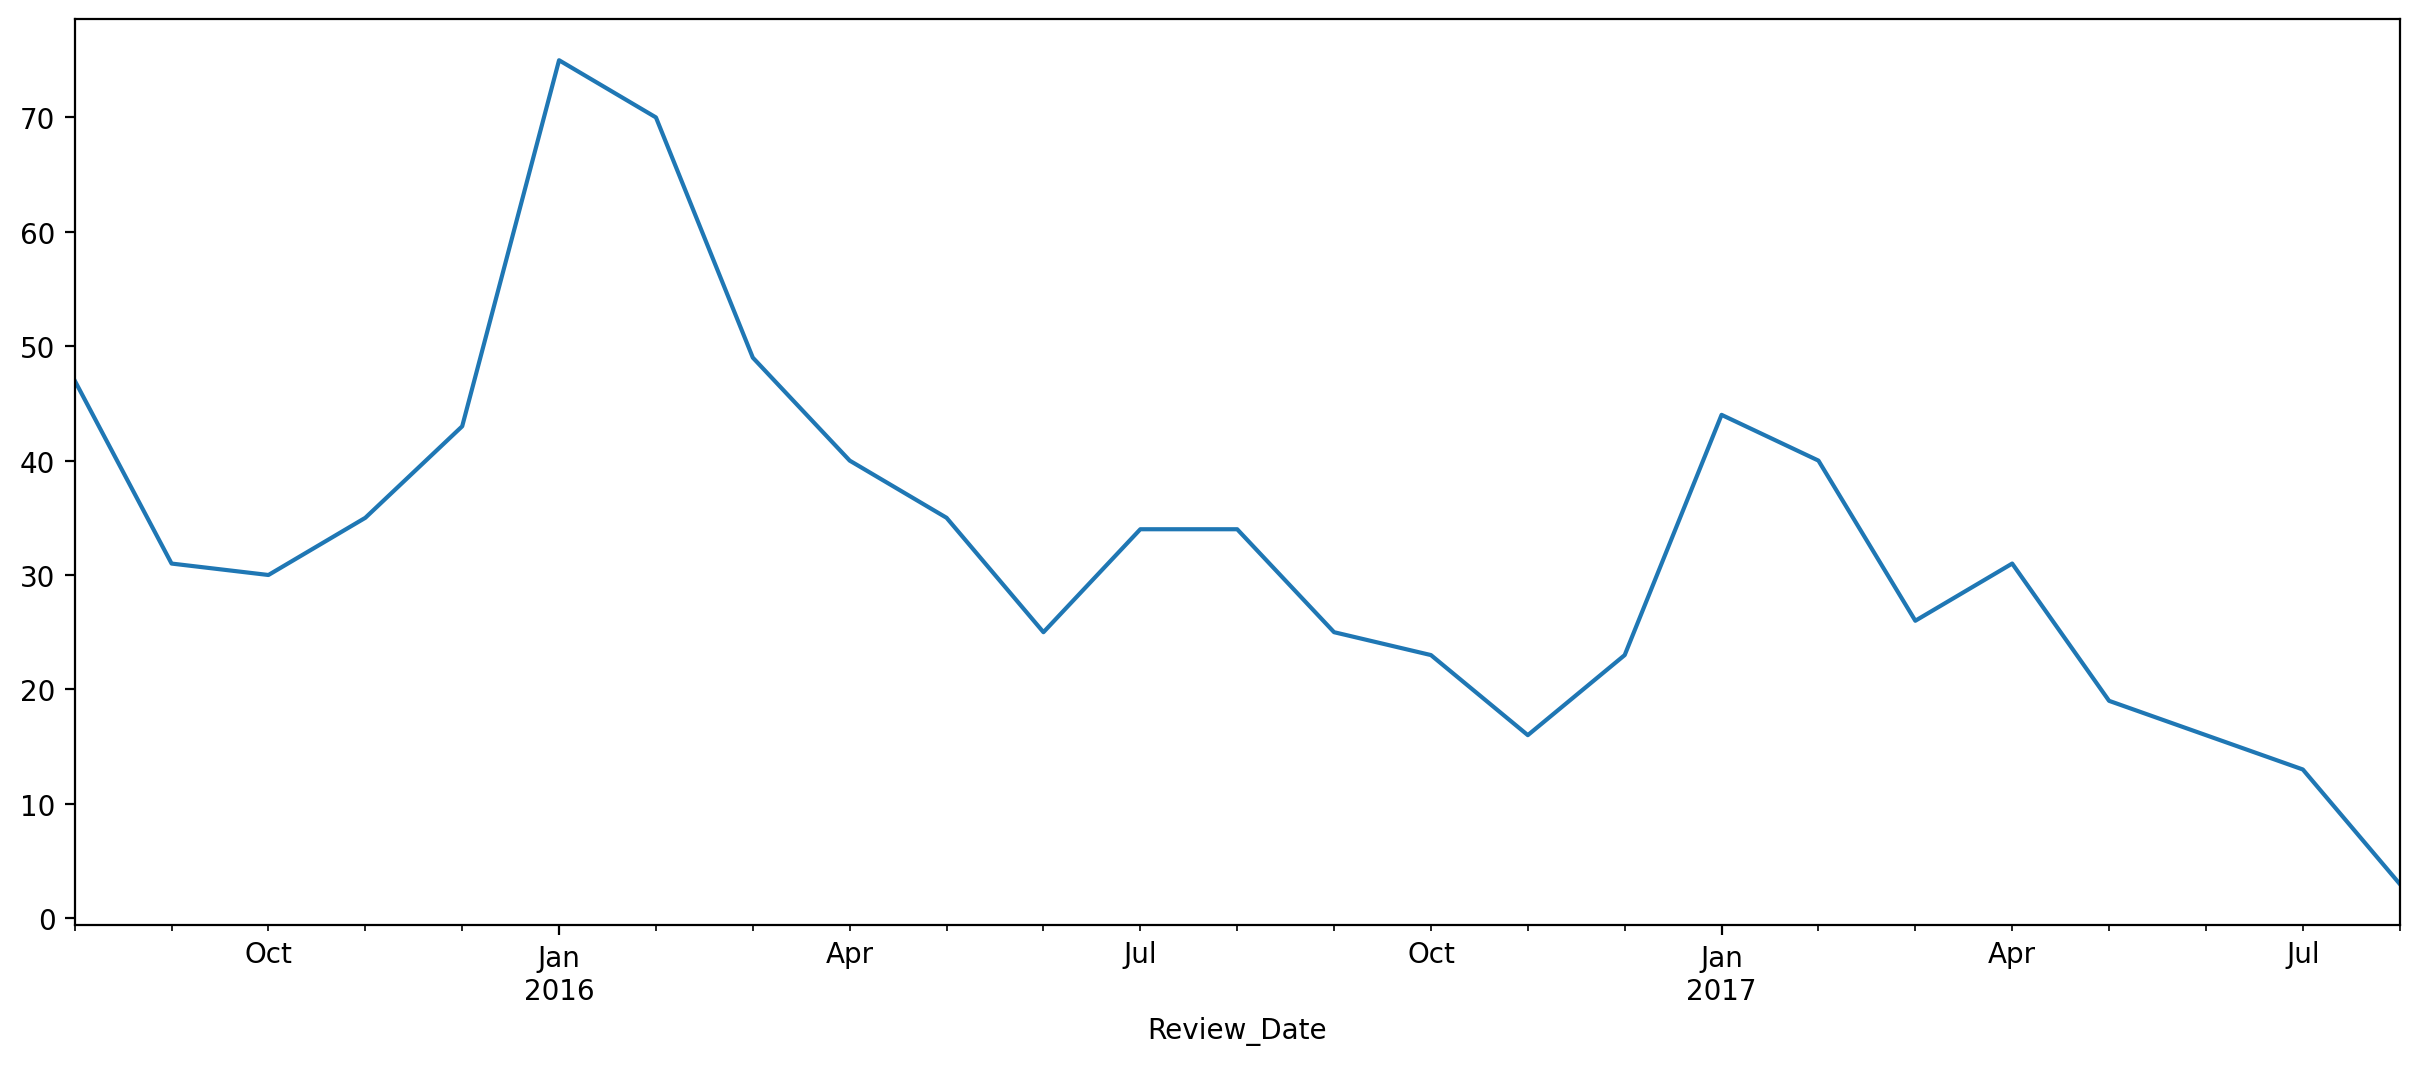

In [11]:


reviews['Review_Date'] = pd.to_datetime(reviews['Review_Date']).dt.to_period('M')
TopHotelReviews = reviews[(reviews.Hotel_Name == 'Strand Palace Hotel')]

df = TopHotelReviews.filter(items=['Reviewer_Score','Review_Date','Review_Total_Negative_Word_Counts']).sort_values(by='Review_Date')
OnlyPositive = df[(df.Review_Total_Negative_Word_Counts == 0)]

plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
OnlyPositive.groupby('Review_Date').Reviewer_Score.count().plot()

### Global representation of the average_score of the hotels

<AxesSubplot:xlabel='Average_Score'>

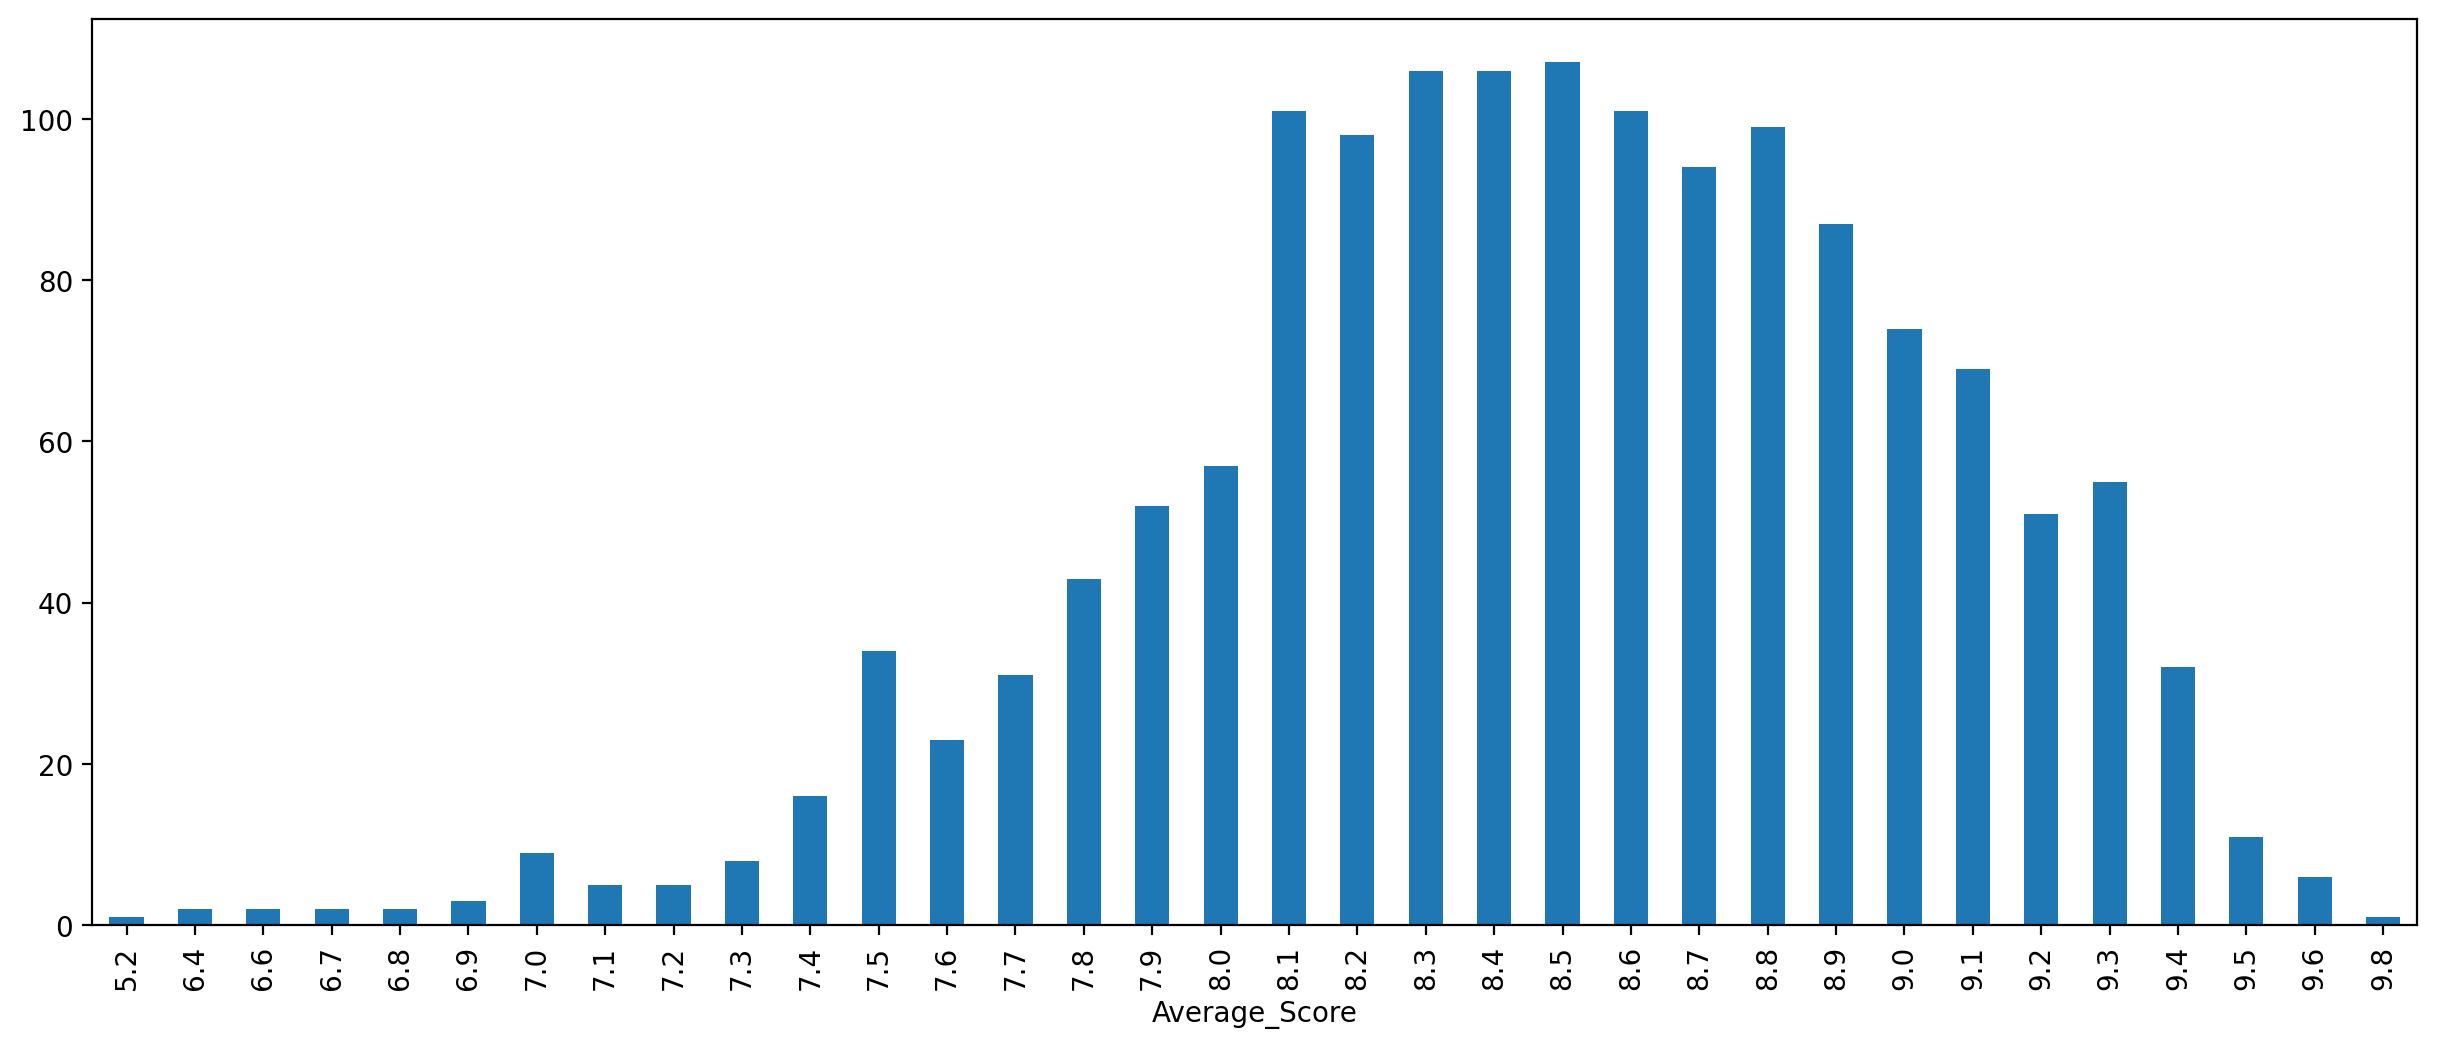

In [12]:
data_plot = reviews[["Hotel_Name","Average_Score"]].drop_duplicates()
data_plot.groupby('Average_Score').Hotel_Name.count().plot(kind='bar')

# We can see that most hotel ratings are between 8.0 and 8.8

### Representation of the WORSE average of the scores given according to the nationality of the reviewers

<AxesSubplot:xlabel='Reviewer_Nationality'>

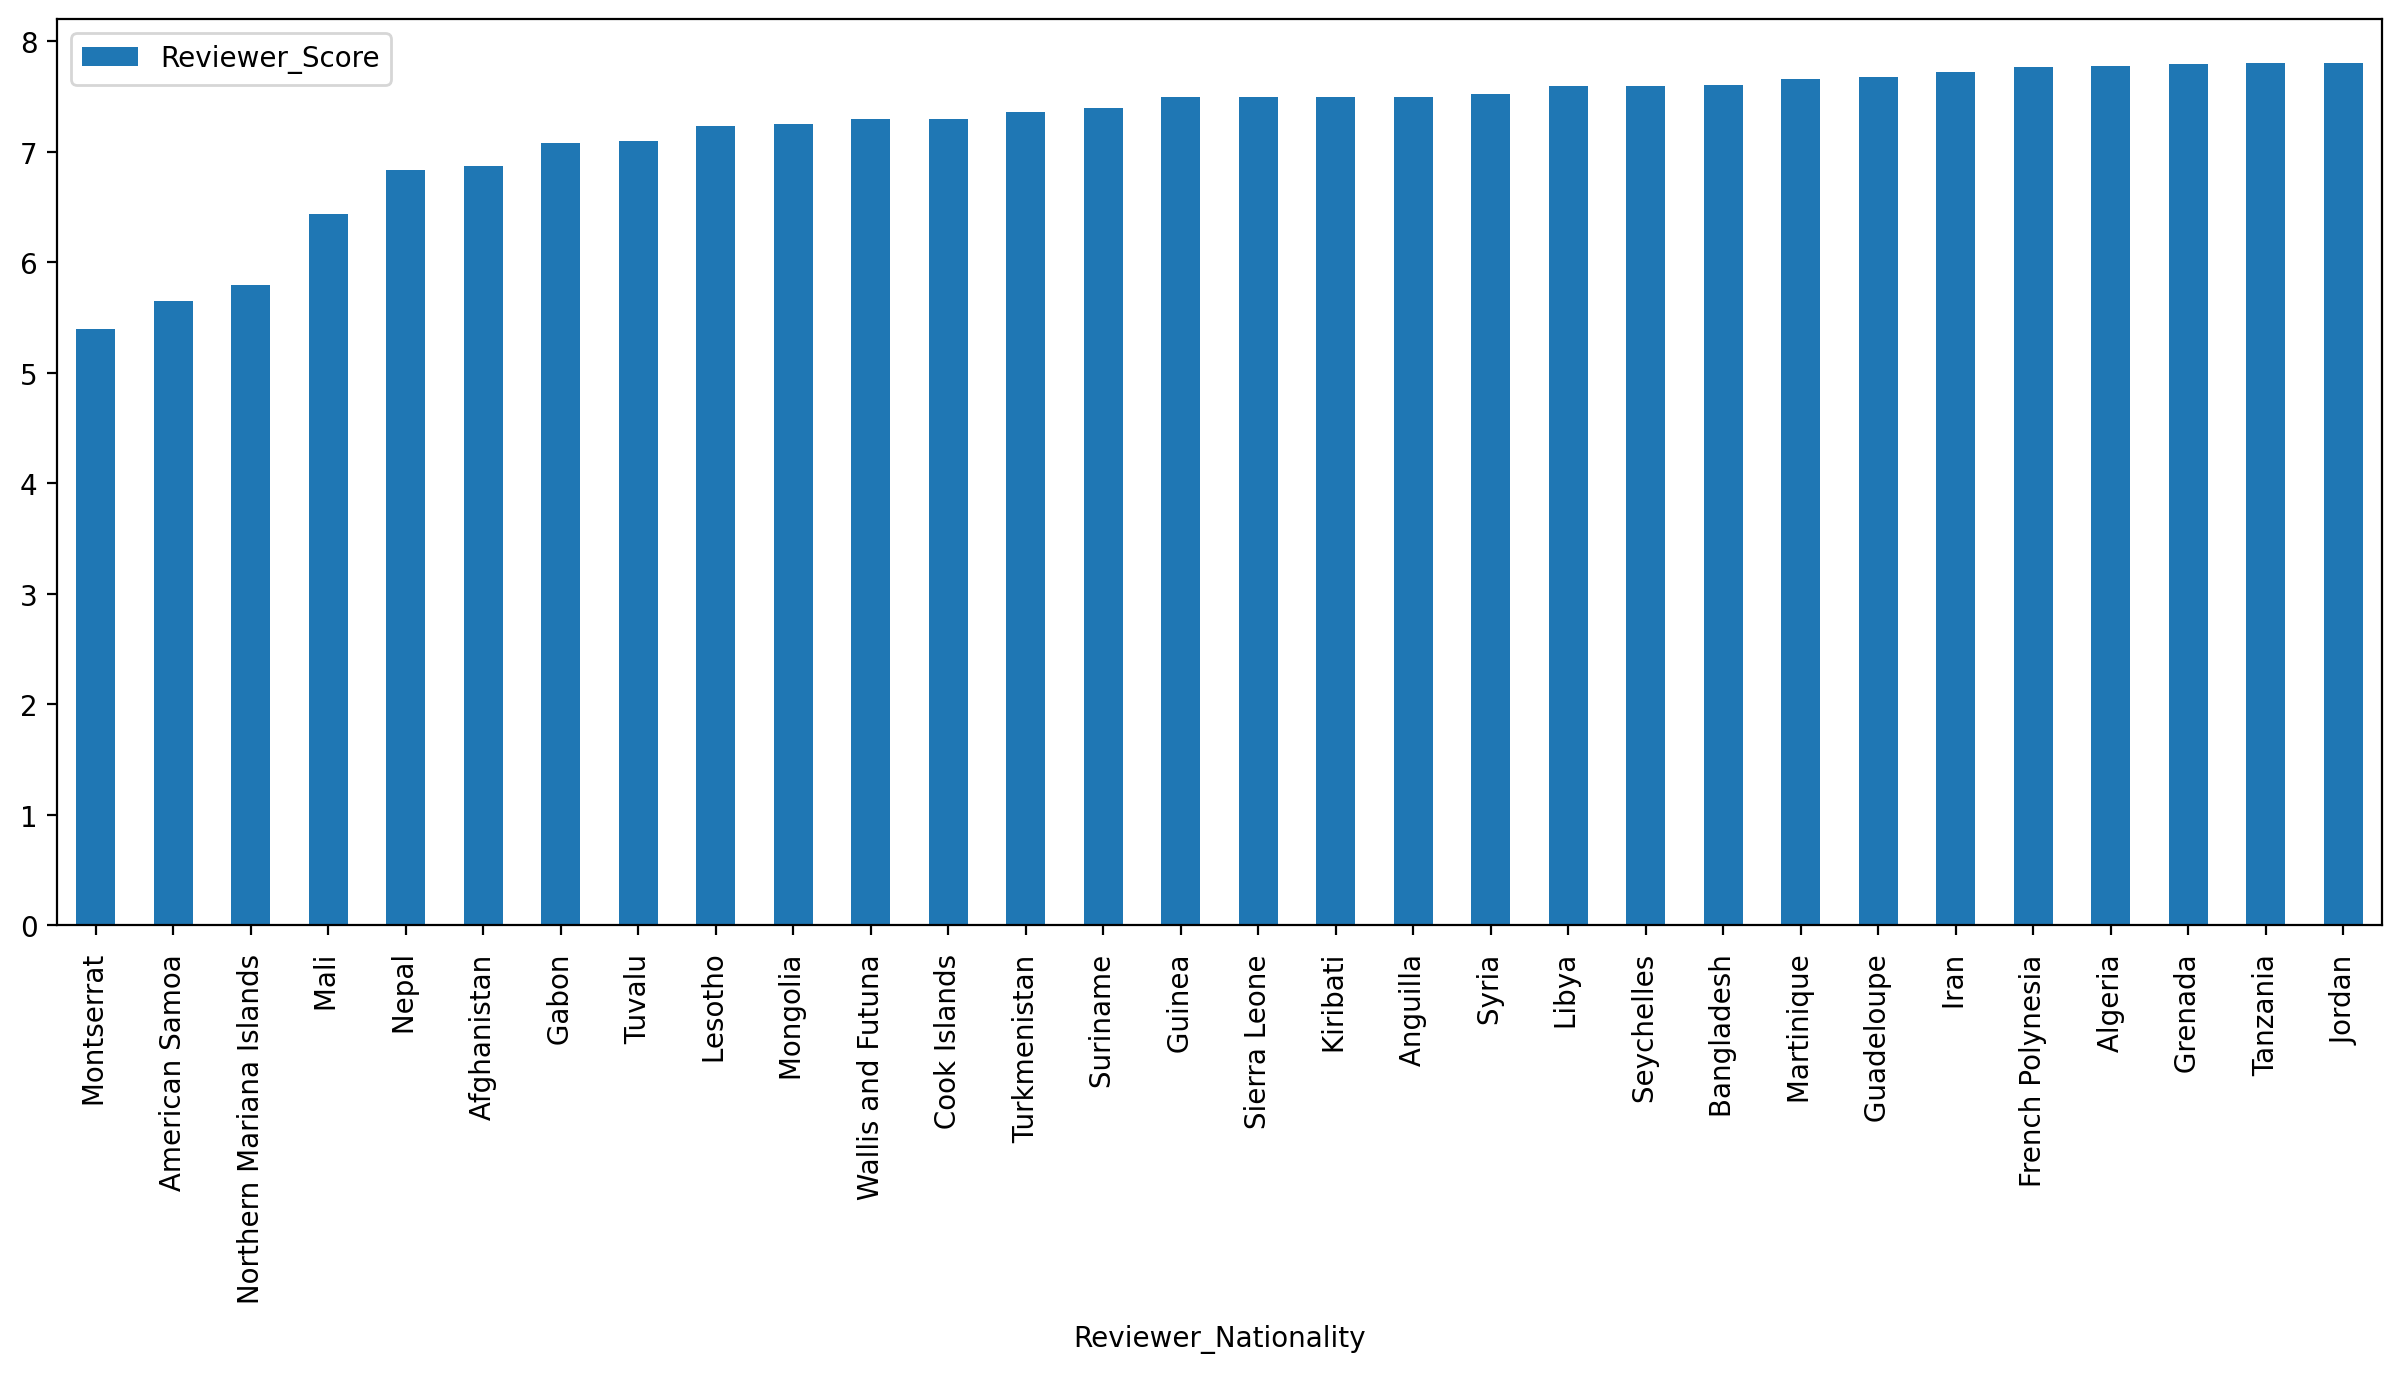

In [13]:
dfFinal=pd.pivot_table(data=reviews,index='Reviewer_Nationality')
dfFinal.filter(items=["Reviewer_Nationality","Reviewer_Score"]).sort_values(by='Reviewer_Score')[:30].plot(kind='bar')